In [17]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [185]:
from sklearn.model_selection  import train_test_split
X = load_boston().data
Y = load_boston().target
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3)

In [186]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
df_train=pd.DataFrame(X_train)
df_test=pd.DataFrame(X_test)
df_train['Y']=y_train
df_test["Y"]=y_test
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Y
0,-0.392410,0.589949,-0.894697,-0.26968,-0.898121,-0.251977,-1.429332,1.898028,-0.196990,-0.752811,0.561450,0.394265,-0.802077,23.3
1,-0.406878,3.788791,-1.457645,-0.26968,-1.276276,0.701448,-1.022689,2.138717,-0.539384,-0.917923,-1.584712,0.417097,-1.212299,31.6
2,-0.405388,0.717902,0.569560,-0.26968,-0.799081,-0.158198,-1.440128,-0.060002,-0.653516,-0.835367,-0.138385,0.452373,-0.893707,25.0
3,-0.285190,-0.476332,1.581684,-0.26968,0.641507,0.005206,1.035721,-0.718310,-0.653516,0.149403,1.261285,0.458235,-0.040841,19.6
4,-0.081728,-0.476332,1.021691,-0.26968,0.920620,-0.800446,-0.745595,-0.342883,1.629114,1.499776,0.794728,-0.184558,0.222772,19.9


In [187]:
def fit_sgd(lr_rate):
    W=np.zeros(13).reshape(1,13)
    B=0
    learning_rate=lr_rate
    num_iteration=1000
    while num_iteration>=0:
        W_temp=np.zeros(13).reshape(1,13) 
        B_temp=0
        p_b=B 
        p_w=W
        temp_data=df_train.sample(10)
        y=np.array(temp_data['Y'])
        x=temp_data.drop("Y",axis=1)
        x=np.array(x)
        for i in range(10):
            #print(W_temp)
            W_temp+=(-2)*x[i]*(y[i]-(np.dot(p_w,x[i]))-p_b)#dl(w)/dw
            B_temp+=(-2)*(y[i]-(np.dot(p_w,x[i]))-p_b)#dl(b)/db
            #print(B_temp)
    
        W=(p_w-(learning_rate*(W_temp/10)))#Wj+1=Wj-r((dl/db)wj)
        B=(p_b-(learning_rate*(B_temp/10)))#Bj+1=Bj-r((dl/db)bj)
        #learning_rate=learning_rate/2
    
        if(p_w==W).all():
            break
        num_iteration-=1
        
        
        
    return W,B    

In [188]:
def predict_y(W,B):
    te_predicted=[]
    tr_predicted=[]
    for j in range(len(X_test)):
        pred_val=np.dot(W,X_test[j])+B
        te_predicted.append(np.asscalar(pred_val))
    te_error=mean_squared_error(y_test,te_predicted)  
    for k in range(len(X_train)):
        pred_val=np.dot(W,X_train[k])+B
        tr_predicted.append(np.asscalar(pred_val))
    tr_error=mean_squared_error(y_train,tr_predicted)     
    #print(error)
    return te_error,tr_error

In [189]:
X_test = np.array(X_test)
Y_test=np.array(y_test)

In [190]:
te_error_list=[]
tr_error_list=[]
alpha=[10**i for i in range(-10,0) ]
for i in alpha:
    W_final,B_final=fit_sgd(i)
    te_error,tr_error=predict_y(W_final,B_final)
    print("alpha:{} -> Train error{} | Test error {}".format(i,tr_error,te_error))
    te_error_list.append(te_error)
    tr_error_list.append(tr_error)
print("Vector W->",W_final)
print("Scalar B->",B_final)

alpha:1e-10 -> Train error612.5391526505889 | Test error 544.6534605372182
alpha:1e-09 -> Train error612.5363764967029 | Test error 544.650879874837
alpha:1e-08 -> Train error612.5089828854838 | Test error 544.6253957601785
alpha:1e-07 -> Train error612.2357082555013 | Test error 544.3714175210334
alpha:1e-06 -> Train error609.4369285548715 | Test error 541.7711452627358
alpha:1e-05 -> Train error582.3757434038783 | Test error 516.7711596432447
alpha:0.0001 -> Train error395.4167629773064 | Test error 346.0926337728074
alpha:0.001 -> Train error33.42526761188138 | Test error 28.156530895466595
alpha:0.01 -> Train error22.727688612897918 | Test error 21.795514424958487
alpha:0.1 -> Train error29.968656431260005 | Test error 30.056963009806935
Vector W-> [[-1.32779763  0.64199355  0.68211364  1.96958431 -1.93089349  2.7174515
   0.56022485 -3.68663973  1.13313951 -2.02793923 -2.36557061 -0.08875712
  -5.55215717]]
Scalar B-> [23.5743354]


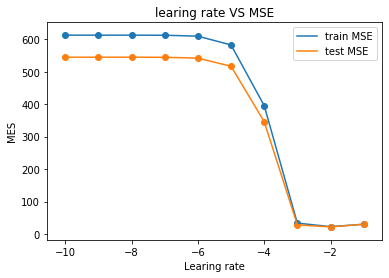

In [191]:
import math
alpha=[math.log10(i) for i in alpha]
plt.plot(alpha,tr_error_list,label='train MSE')
plt.plot(alpha,te_error_list,label='test MSE')
plt.xlabel("Learing rate")
plt.ylabel("MES")
plt.scatter(alpha,tr_error_list)
plt.scatter(alpha,te_error_list)
plt.legend()
plt.title("learing rate VS MSE")
plt.show()

1. From the above figure we can see than ,alpha=0.01 is giving best result

Text(0, 0.5, 'Actual price')

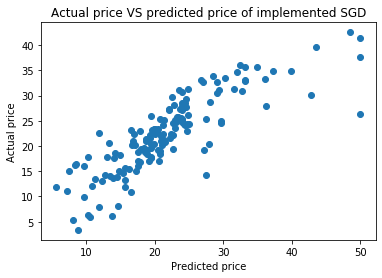

In [192]:
pred_values=[]
W_final,B_final=fit_sgd(0.01)
for j in range(len(X_test)):
    pred_val=np.dot(W_final,X_test[j])+B_final
    pred_values.append(pred_val)
plt.scatter(y_test,pred_values)    
plt.title("Actual price VS predicted price of implemented SGD")
plt.xlabel("Predicted price")
plt.ylabel("Actual price")

In [193]:
clf = SGDRegressor(alpha=0.01)
clf.fit(X_train,y_train)
print("Test error",mean_squared_error(y_test, clf.predict(X_test)))
print("Train error",mean_squared_error(y_train, clf.predict(X_train)))

Test error 21.857572018520077
Train error 22.426923563307376


Text(0, 0.5, 'Actual price')

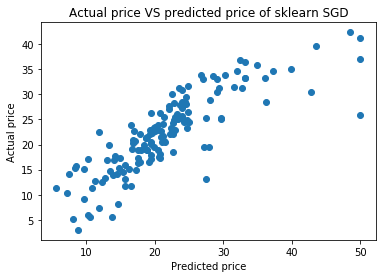

In [194]:
pred_values_sk=[]
for j in range(len(X_test)):
    pred_val=clf.predict(X_test[j].reshape(1,-1))
    pred_values_sk.append(pred_val) 
plt.scatter(y_test,pred_values_sk)    
plt.title("Actual price VS predicted price of sklearn SGD")
plt.xlabel("Predicted price")
plt.ylabel("Actual price")

In [195]:
from prettytable import PrettyTable 
x = PrettyTable()

x.field_names = ["SGD", "Alpha","Train error", "Test error"]

x.add_row(["implemented", 0.01,22.727 , 21.795])
x.add_row(["sklearn", 0.01,22.426 , 21.857])
print(x)

+-------------+-------+-------------+------------+
|     SGD     | Alpha | Train error | Test error |
+-------------+-------+-------------+------------+
| implemented |  0.01 |    22.727   |   21.795   |
|   sklearn   |  0.01 |    22.426   |   21.857   |
+-------------+-------+-------------+------------+
